In [1]:
import numpy as np
from scipy.spatial.distance import mahalanobis, euclidean

In [2]:
import pandas as pd
import numpy as np

In [3]:
def update_tracks(det, hyps):
    new_hyps=[]
    for i, hyp in enumerate(hyps):
        for detection_id in det.ind.unique():
            repeat_scen = hyp + [detection_id]
            new_hyps.append(repeat_scen)
    return new_hyps

In [28]:
def score_del(new_pos, old_pos, area, var):
    cov = np.array([[var, 0], [0, var]])
    mah = mahalanobis(old_pos, new_pos, cov)
    delta = np.log(np.divide(area, 2*np.pi)) - 0.5*np.log(np.linalg.det(cov)) - 0.5*mah
    return delta, mah


def get_this_last_det(detections, track):
    t = len(track) -1
    
    this = track[-1]
    this_pos = detections[(detections.time == t) & (detections.ind == this)][["x", "y"]].to_numpy()
    
    if this == 0:
        last = np.Nan
        return this_pos, np.Nan
    else:
        last_t = np.max(np.nonzero(track[:-1]))
        last = track[last_t]
        last_pos = detections[(detections.time == last_t) & (detections.ind == last)][["x", "y"]].to_numpy()
        return this_pos, last_pos
    

def score_tracks(tracks, scores, detections, area, var):
    tracks = np.shape(tracks)
    t = tracks.shape[1] - 1
    
    dets = detections[detections.time == t]
    
    new_scores = []
    for i, track in enumerate(tracks):

        
        
        
        new_scores.append(scores[i] + score_del(new_pos, old_pos, area, var))
    
    return new_scores
        
        

In [29]:
tracks[0]

[1]

In [30]:
get_this_last_det(detections, tracks[0])

ValueError: zero-size array to reduction operation maximum which has no identity

In [14]:
detections = pd.DataFrame(columns=['ind', 'time', 'x', 'y'])
detections["ind"] = [1, 0, 1, 2, 0, 1, 2]
detections["time"] = [0, 1, 1, 1, 2, 2, 2]
detections["x"] = [0, np.nan, 0.001, 2, np.nan, 0.002, 2.001]
detections["y"] = [0, np.nan, 0.001, 2, np.nan, 0.002, 2.001]

detections

area = 0.2
var = 0.1**2

In [15]:
tracks = [[1]]

In [6]:
tracks = update_tracks(detections[detections.time==1], tracks)
scores = 

[[1, 0], [1, 1], [1, 2]]

In [7]:
tracks = update_tracks(detections[detections.time==2], tracks)
tracks

[[1, 0, 0],
 [1, 0, 1],
 [1, 0, 2],
 [1, 1, 0],
 [1, 1, 1],
 [1, 1, 2],
 [1, 2, 0],
 [1, 2, 1],
 [1, 2, 2]]

In [9]:
tracks = np.array(tracks)

t_steps = 3

In [12]:
tracks[0]

array([1, 0, 0])

go through each timestep, build and score tracks

In [23]:
t = 0
dets = detections[detections.time==t]

tracks = [[int(d["ind"])] for _, d in dets.iterrows()]
score = 

[[1]]

In [2]:
def simulate2(starting, norm):
    return [s + np.random.normal(0, norm, 2) for s in starting]

def simulate1(starting, norm):
    return [s + np.random.normal(0, norm) for s in starting]

def simulate(starting, norm, n_steps, d2=False):
    s = [starting]
    for i in range(n_steps):
        if d2:
            s.append(simulate2(s[i], norm))
        else:
            s.append(simulate1(s[i], norm))
    
    return np.array(s)

In [3]:
norm = 0.1 **2
starting = np.array([[0,0], [1,1], [2,2]])

pts = simulate(starting, norm, 1, d2=True)

In [4]:
for p in pts:
    print(p)

[[0. 0.]
 [1. 1.]
 [2. 2.]]
[[-0.01669369  0.00230873]
 [ 1.00939258  0.98525223]
 [ 1.98484     2.00090847]]


In [5]:
tracks = pts[0]
dets = pts[1]

In [13]:
area = 2*2



In [15]:
old = tracks[0] 
new = dets[0]
var = norm
area = 0.5
cov = np.array([[var, 0], [0,var]])
for new in dets:
    print(new, score_del(new, old, area, var))


[-0.01669369  0.00230873] (2.073303309725542, 0.0016852585865154784)
[1.00939258 0.98525223] (2.0036194309624067, 0.14105301611278684)
[1.98484    2.00090847] (1.9332273050826274, 0.2818372678723455)


In [11]:
print(new, old, mahalanobis(new, old, cov))

[1.98484    2.00090847] [0. 0.] 0.2818372678723455


array([2.02814786, 1.96491661])

In [23]:
import matplotlib.pyplot as plt

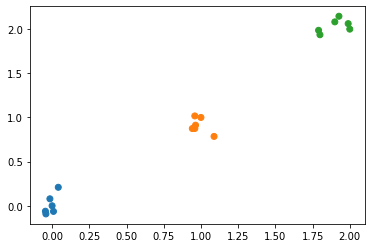

In [24]:
fig, ax = plt.subplots()
for t in range(6):
    ax.scatter(pts[t][:,0], pts[t][:,1], c=['#1f77b4', '#ff7f0e', '#2ca02c'])
    

In [30]:
pts[t][:,0]

array([0., 1., 2.])

In [1]:
import pandas as pd

In [2]:
detections = pd.DataFrame()

In [3]:
detections["id"] = [0,1,2]
detections["time"] = [0,1,2]
detections["x"] = [0,1,2]

In [4]:
detections

,id,time,x
0,0,0,0
1,1,1,1
2,2,2,2


In [5]:
import matplotlib.pyplot as plt

/home/nader/Projects/thesis/benthic_targets/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


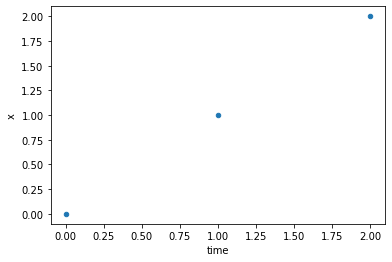

In [6]:
fig, ax = plt.subplots()
detections.plot(x="time", y="x", kind="scatter", ax=ax)
fig.show()

In [7]:
import numpy as np

In [8]:
def score_del(v, var, dist, new_track=False, pd=0):
    if new_track:
        scored = np.log(1-pd)
    else:
        scored = log(v/(2*np.pi)) - 0.5 * np.log(var) - (dist*dist)/2
    
    return scored
    

In [9]:
hyps = [
    [[0, 1, 2]],
    [[0, np.nan, np.nan], [np.nan, 1, 2] ],
    [[0, 1, np.nan], [np.nan, np.nan, 2]],
    [[0, np.nan, 2], [np.nan, 1 , np.nan]],
    [[0, np.nan, np.nan], [np.nan, 1, np.nan], [np.nan, np.nan, 2]]
]

In [10]:
for hyp in hyps:
    print(hyp)

[[0, 1, 2]]
[[0, nan, nan], [nan, 1, 2]]
[[0, 1, nan], [nan, nan, 2]]
[[0, nan, 2], [nan, 1, nan]]
[[0, nan, nan], [nan, 1, nan], [nan, nan, 2]]


In [11]:
def two_tail_prob(z):
    return 2*(1-stats.norm.cdf(z))

def generate_probability_matrix(detections, faunastep):

    n_dets = len(detections)
    dists = np.zeros((len(detections), len(detections)))
    Dtime = np.zeros((len(detections), len(detections)))
    for i in range(n_dets):
        for j in range(n_dets):
            dists[i, j] = np.abs(detections.loc[i]["object_location"] - detections.loc[j]["object_location"])
            Dtime[i, j] = np.abs(detections.loc[i]["time"] - detections.loc[j]["time"])

    z_stat = np.divide(dists, faunastep * Dtime)
    return two_tail_prob(z_stat)


In [12]:
from scipy.spatial.distance import mahalanobis

In [13]:
cov = [[1,0],[0,1]]

In [14]:
p0 = [0,0]
p1 = [1,1]

In [15]:
mahalanobis(p0, p1, cov)

1.4142135623730951

In [16]:
from scipy.spatial.distance import euclidean

In [17]:
euclidean(p0, p1)

1.4142135623730951